<a href="https://www.kaggle.com/code/neenues/multiclass-prediction-obesityrisk-randomforest" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Multi-Class Prediction of Obesity Risk](https://www.kaggle.com/competitions/playground-series-s4e2)
### Playground Series - Season 4, Episode 2.
_______________________________________________________________________ 
# Author Details:
- Name: Neenu E S
- Profiles: [Github](https://github.com/neenu05) | [LinkedIn](https://www.linkedin.com/in/neenues/) | [Kaggle](https://www.kaggle.com/neenues)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:
[Walter Reade, Ashley Chow. (2024). Multi-Class Prediction of Obesity Risk. Kaggle.](https://www.kaggle.com/competitions/playground-series-s4e2)
__________________________________________________________________________
# Code Execution : 
- [Execute the notebook in Kaggle](https://www.kaggle.com/code/neenues/multi-class-prediction-of-cirrhosis-score-0-468/edit/run/157941775)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

In [2]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, log_loss
from sklearn.metrics import precision_recall_fscore_support as score


In [3]:
data_train =  pd.read_csv('train.csv')
data_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data_train.shape

(20758, 18)

In [5]:
#Checking the dataset description
describe = data_train.describe()
describe.transpose()

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [6]:
data_train[data_train.duplicated()]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [7]:
data_train.isnull().sum()  ## no null values

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

- The attributes related with eating habits are: 
    * Frequent consumption of high caloric food (FAVC), 
    * Frequency of consumption of vegetables (FCVC), 
    * Number of main meals (NCP), 
    * Consumption of food between meals (CAEC), 
    * Consumption of water daily (CH20), and Consumption of alcohol (CALC). 
- The attributes related with the physical condition are: 
    * Calories consumption monitoring (SCC), 
    * Physical activity frequency (FAF), 
    * Time using technology devices (TUE), 
    * Transportation used (MTRANS)
- variables obtained :
    * Gender, Age, Height and Weight.
- NObesity values are:
    * Underweight Less than 18.5
    * Normal 18.5 to 24.9
    * Overweight 25.0 to 29.9
    * Obesity I 30.0 to 34.9
    * Obesity II 35.0 to 39.9
    * Obesity III Higher than 40

In [9]:
# Get categorical columns
categorical_columns = data_train.select_dtypes(include='object').columns

# Get numerical columns
numerical_columns = data_train.select_dtypes(include='number').columns

# Print the categorical columns
print(categorical_columns)

# Print the numerical columns
print(numerical_columns)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [10]:
data_train['Gender'].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

In [11]:
data_train['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

In [12]:
data_train['FAVC'].value_counts()

FAVC
yes    18982
no      1776
Name: count, dtype: int64

In [13]:
data_train['CAEC'].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [14]:
data_train['SMOKE'].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

In [15]:
data_train['SCC'].value_counts()

SCC
no     20071
yes      687
Name: count, dtype: int64

In [16]:
data_train['CALC'].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [17]:
data_train['MTRANS'].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [18]:
# replacing values
data_train['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
data_train['family_history_with_overweight'].replace(['yes','no'], [1,0], inplace = True)
data_train['FAVC'].replace(['yes','no'],[1, 0], inplace=True)

data_train['CAEC'].replace(['Sometimes','Frequently','Always','no'], [3,2,1,0], inplace = True)

data_train['SMOKE'].replace(['yes','no'], [1,0], inplace=True)
data_train['SCC'].replace(['yes','no'], [1,0], inplace = True)

data_train['CALC'].replace(['Sometimes','Frequently','no'],[2,1,0], inplace=True)

data_train['MTRANS'].replace(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'], [4,3,2,1,0], inplace = True)
                               

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


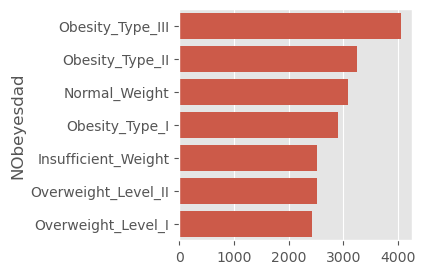

In [19]:
Obesity_counts = data_train['NObeyesdad'].value_counts()
print(Obesity_counts)
fig, ax = plt.subplots(figsize=(3, 3))
fig = sns.barplot(y= Obesity_counts.index, x= Obesity_counts.values, ax=ax)

In [20]:
data_train['NObeyesdad'].replace(['Obesity_Type_III',
                                  'Obesity_Type_II', 
                                  'Normal_Weight', 
                                  'Obesity_Type_I', 
                                  'Insufficient_Weight',
                                  'Overweight_Level_II',
                                  'Overweight_Level_I'], [6,5,4,3,2,1,0], inplace = True)

In [21]:
data_train.drop(['id'], axis=1, inplace=True)

In [22]:
data_train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [23]:
data_train['Gender'].value_counts()

Gender
0    10422
1    10336
Name: count, dtype: int64

In [24]:
# sns.barplot(data_train)#sns.barplot(data

In [25]:
X=data_train.iloc[:,:-1].values #  last columns not inculded
y=data_train.iloc[:,-1].values  # only last - target


In [26]:
#Data Modeling
#Train Test Split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16606, 16) (4152, 16) (16606,) (4152,)


In [27]:
accuracy_list = []
precision_all = []
recall_all = []  
f1_score_all = []

In [28]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)

r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

print("\nAccuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))
print("Classification Report \n", classification_report(y_test, r_pred))

r_prec, r_recall, r_f1, r_supp = score(y_test, r_pred)
precision_all.append(100*r_prec[1])
recall_all.append(100*r_recall[1])
f1_score_all.append(100*r_f1[1])


Accuracy of Random Forest Classifier is :  90.17%
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       489
           1       0.81      0.83      0.82       495
           2       0.92      0.91      0.92       513
           3       0.89      0.89      0.89       589
           4       0.84      0.88      0.86       608
           5       0.97      0.97      0.97       681
           6       1.00      0.99      1.00       777

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



In [29]:
model_list = 'RandomForest'
# dictionary of lists 
dict = {'Model':'Random Forest',
        'Accuracy': np.round(accuracy_list, 3), 
        'Precision': np.round(precision_all, 2), 
        'Recall': np.round(recall_all, 2), 
        'F1-score':np.round(f1_score_all, 2)} 
    
result = pd.DataFrame(dict)
    
result

,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,90.173,81.42,83.23,82.32


### PreparingTest Data for prediction

In [30]:
data_test =  pd.read_csv('test.csv')
data_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [31]:
data_test.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

In [32]:
ids = data_test['id']

In [33]:
data_test.drop(['id'], axis=1, inplace=True)

In [34]:
data_test.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [35]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             

In [36]:
# Get categorical columns
categorical_col = data_test.select_dtypes(include='object').columns

# Print the categorical columns
print(categorical_col)



Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [37]:
data_test['CALC'].value_counts()

CALC
Sometimes     9979
no            3513
Frequently     346
Always           2
Name: count, dtype: int64

In [38]:
# replacing values
data_test['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
data_test['family_history_with_overweight'].replace(['yes','no'], [1,0], inplace = True)
data_test['FAVC'].replace(['yes','no'],[1, 0], inplace=True)

data_test['CAEC'].replace(['Sometimes','Frequently','Always','no'], [3,2,1,0], inplace = True)

data_test['SMOKE'].replace(['yes','no'], [1,0], inplace=True)
data_test['SCC'].replace(['yes','no'], [1,0], inplace = True)

data_test['CALC'].replace(['Sometimes','Frequently','Always','no'], [3,2,1,0], inplace=True)

data_test['MTRANS'].replace(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'], [4,3,2,1,0], inplace = True)
                               

In [39]:
data_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,3,0,2.825629,0,0.855400,0.000000,3,4
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,3,0,3.000000,0,1.000000,0.000000,3,4
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,3,0,2.621877,0,0.000000,0.250502,3,4
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,3,0,2.786417,0,0.094851,0.000000,3,4
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,3,0,2.653531,0,0.000000,0.741069,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,3,0,1.000000,0,0.807076,0.778632,3,4
13836,0,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,3,0,2.000000,0,0.000000,0.000000,3,4
13837,0,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,2,0,2.000000,0,1.949840,1.000000,3,4
13838,1,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,3,0,2.000000,0,3.000000,2.000000,0,4


In [40]:
X_test=data_test.iloc[:,:].values  # only first column not inculded  X_sub

In [41]:
X_test.shape

(13840, 16)

#### Predict on test dataset

In [42]:
# predict on test dataset

y_pred = r_clf.predict(X_test)


In [43]:
y_pred_list = y_pred.tolist()


In [44]:
def replace(array, dict):
    for i in range(len(array)):
        if array[i] in dict:
            array[i] = dict[array[i]]
    return array

dict = {6:'Obesity_Type_III', 5:'Obesity_Type_II', 4:'Normal_Weight', 3:'Obesity_Type_I', 
          2:'Insufficient_Weight',1:'Overweight_Level_II',0:'Overweight_Level_I'}

# Combine Predictions with IDs for the expected output
out_d = pd.DataFrame({'id': ids, 'NObeyesdad': replace(y_pred_list, dict)}) 
out_d.head()


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [45]:
# Save the predictions to a CSV file
out_d.to_csv('output.csv', index=False)